In [40]:
import model
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
random.seed(13)
np.random.seed(100)

In [39]:
bs = model.BlackScholes(100, 100, 0.3, 0.05, 0.01, 1)
numeric = model.Numerical(100, 100, 0.3, 0.05, 0.01, 1)

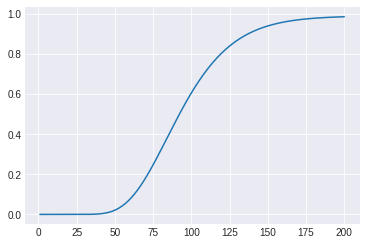

In [5]:
spot = np.linspace(1, 200, 200)
delta = [bs.Delta() for bs.spot0 in spot]
plt.plot(spot, delta)
plt.show()

In [6]:
in_the_money = model.BlackScholes(100, 130, 0.3, 0.05, 0.01, 1)
delta = [in_the_money.Delta() for in_the_money.T in time]
plt.plot(time, delta)
plt.show()

NameError: name 'time' is not defined

In [ ]:
at_the_money = model.BlackScholes(100, 100, 0.3, 0.05, 0.01, 1)
delta = [at_the_money.Delta() for at_the_money.T in time]
plt.plot(time, delta)

In [7]:
out_the_money = model.BlackScholes(100, 70, 0.3, 0.05, 0.01, 1)
delta = [out_the_money.Delta() for out_the_money.T in time]
plt.plot(time, delta)
plt.show()

NameError: name 'time' is not defined

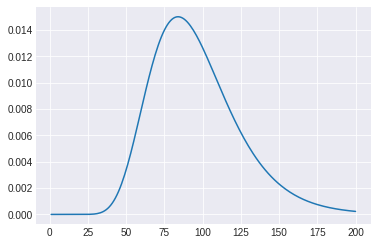

In [8]:
gamma = [bs.Gamma() for bs.spot0 in spot]
plt.plot(spot, gamma)
plt.show()

In [9]:
volatility = np.linspace(0.001, 10, 200)
vega_vol = [bs.Vega() for bs.sigma in volatility]
vega_spot = [bs.Vega() for bs.spot0 in spot]
vega_time = [bs.Vega() for bs.T in time]

plt.plot(volatility, vega_vol)
plt.show()

NameError: name 'time' is not defined

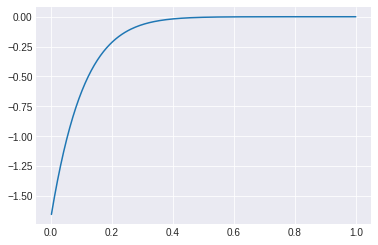

In [14]:
risk_free = np.linspace(0.001, 1, 200)
rho = [bs.Rho() for bs.r in risk_free]
plt.plot(risk_free, rho)
plt.show()

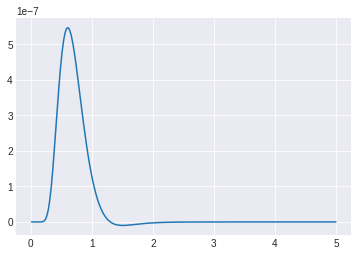

In [15]:
time = np.linspace(0.01, 5, 200)
theta = [bs.Theta() for bs.T in time]
plt.plot(time, theta)
plt.show()

In [16]:
bs.print_parameters()

---------------------------------------------
---------------------------------------------
Parameters of Option Pricer:
---------------------------------------------
Underlying Asset Price =  200.0
Strike Price =  100
Volatility =  0.3
Risk-Free Rate =  1.0
Dividend Rate =  0.01
Time to Maturity (years) =  5.0
---------------------------------------------
---------------------------------------------


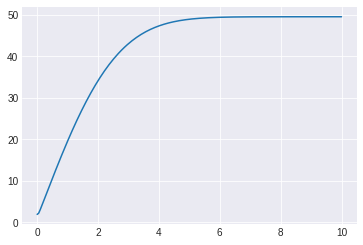

In [17]:
# how does the Black-Scholes price of a call option vary as a function of volatility
bs = model.BlackScholes(50, 50, 0.3, 0.05, 0.01, 1)
vanilla_price = [bs.vanilla_price() for bs.sigma in volatility]
price_to_volatility =  volatility / vanilla_price
plt.plot(volatility, vanilla_price)
plt.show()

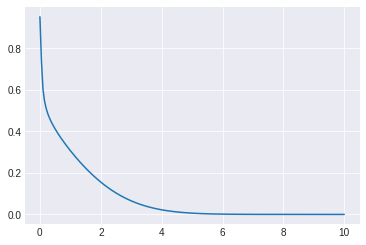

In [18]:
# same for digital call option
bs = model.BlackScholes(100,100, 0.3, 0.05, 0.01, 1)
digital_price = [bs.digital_price() for bs.sigma in volatility]
plt.plot(volatility, digital_price)
plt.show()

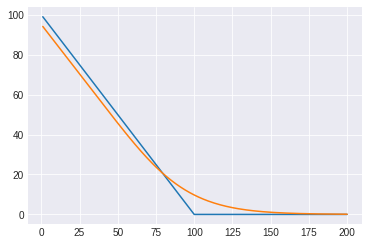

In [30]:
bs = model.BlackScholes(100, 100, 0.3, 0.05, 0.01, 1, opt_type='put')
intrinsic_value = [max(bs.K - s0, 0) for s0 in spot]
put_price = [bs.vanilla_price() for bs.spot0 in spot]
plt.plot(spot, intrinsic_value)
plt.plot(spot, put_price)
plt.show()

Text(512, 0.019929722944007418, '(512, 0.019929722944007418)')

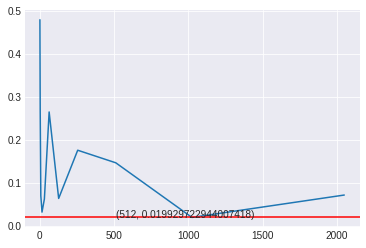

In [46]:
# stepping method error
exact_price = model.BlackScholes(100, 100, 0.10, 0.05, 0., 1).vanilla_price()
numeric = model.Numerical(100, 100, 0.10, 0.05, 0., 1)
steps = [2**n for n in range(1,12)]
numeric.M = 100
simulated_price = [numeric.payoff(numeric.EM()) for numeric.N in steps]
error = abs(exact_price - simulated_price)/exact_price
xy=(2**np.argmin(error), np.min(error))
plt.plot(steps, error)
plt.axhline(min(error), color='r')
plt.annotate('(%s, %s)' %xy, xy=xy)


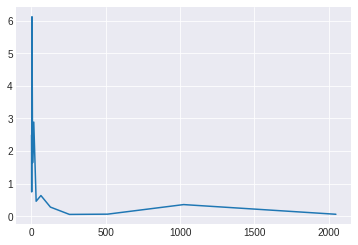

In [42]:
# monte carlo error
numeric = model.Numerical(100, 100, 0.10, 0.05, 0.01, 1)
paths = [2**n for n in range(12)]
paths
numeric.error(paths)
plt.plot(paths, numeric.error(paths))
plt.show()

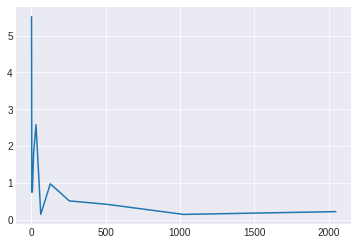

In [34]:
exact_price = model.BlackScholes(100, 100, 0.10, 0.05, 0.01, 1).vanilla_price()
numeric = model.Numerical(100, 100, 0.10, 0.05, 0.01, 1)
paths = [2**n for n in range(1,12)]
simulated_price = [numeric.payoff(numeric.EM()) for numeric.M in paths]
error = abs(exact_price - simulated_price)#/exact_price
plt.plot(paths, error)
plt.show()